In [34]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import pyccl as ccl


font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

In [37]:
nu_list = 143,353,545
nu_list_str = '143,353,545'

path_save = "/Users/aleksandra/Desktop/ILC/ILC_class-sz_curves/"
path_to_files = '/Users/aleksandra/software/class_sz/sz_auxiliary_files/'
nu_list[1]

353

In [38]:
cib_cutoff_dict = {
100 : 400,
143 : 350,
217 : 225,
353 : 315,
545 : 350,
857 : 710,
3000  : 1000,
}
cib_cutoff = []
for i, nu in enumerate(nu_list):
    cib_cutoff.append(cib_cutoff_dict[nu])
cib_cutoff 

[350, 315, 350]

In [39]:
TCMB = 2.726 #Kelvin
TCMB_uK = 2.726e6 #micro-Kelvin


hplanck=6.626068e-34 #MKS
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
m_elec = 510.999 #keV

T_cmb = 2.726 #Kelvin
_h_P_=6.62606896e-34
_k_B_=1.3806504e-23

L0_websky = 4.461102571695613e-07

common_settings = {
                   'mass function' : 'T08', 
                   'delta for cib' : '200m',
                   'hm_consistency': 0,
                   'concentration parameter': 'D08',  # Duffy et al 2008 
        'z_min' : 0.07,
        'z_max' : 6,
        'ell_min': 10.,
        'ell_max': 1e4,
        'dlogell':0.2,
}

A10_pp = {}
A10_pp['pressure profile']= 'Custom. GNFW'
A10_pp['P0GNFW'] = 8.130;
A10_pp['B'] = 1.25
A10_pp['c500'] = 1.156;
A10_pp['gammaGNFW'] = 0.3292;
A10_pp['alphaGNFW'] = 1.0620;
A10_pp['betaGNFW'] = 5.4807;

gnfw_pp = {}
gnfw_pp['pressure profile']= 'Custom. GNFW'
gnfw_pp['B'] = 1.25
gnfw_pp['alphaGNFW']= 0.12
gnfw_pp['betaGNFW']=  4.13
gnfw_pp['gammaGNFW']= 0.3292
gnfw_pp['P0GNFW']= 6.41


# CIB parametes see McCarthy & Madhavacheril 2020
fiona_cib = {
'Redshift evolution of dust temperature' :  0.36,
 'Dust temperature today in Kelvins' : 24.4,
 'Emissivity index of sed' : 1.75,
 'Power law index of SED at high frequency' : 1.7,
 'Redshift evolution of L − M normalisation' : 3.6,
 'Most efficient halo mass in Msun' : pow(10.,12.6),
 'Normalisation of L − M relation in [Jy MPc2/Msun]' : 6.4e-8,
 'Size of of halo masses sourcing CIB emission' : 0.5,
 'has_cib_flux_cut' : 1,
'cib_Snu_cutoff_list [mJy]': cib_cutoff 
 }


In [40]:
ccl_params = {}


# 'M500' is Tinker et al 2008 @ M500
# 'T10' is Tinker et al 2010 @ m200_mean

ccl_params['mass function'] = 'T10'
ccl_params['concentration parameter'] = 'D08'
ccl_params['delta for cib'] = '200m'
ccl_params['hm_consistency'] = 1
ccl_params['damping_1h_term'] = 0

# parameters for Cosmology
ccl_params['Omega_cdm'] = 0.3175-0.022068/0.6711/0.6711
ccl_params['omega_b'] = 0.022068
ccl_params['h'] = 0.6711
ccl_params['A_s'] = 2.2e-9
ccl_params['n_s'] = .9624
ccl_params['k_pivot'] = 0.05


ccl_params['N_ncdm'] = 1
ccl_params['N_ur'] = 0.00641
ccl_params['deg_ncdm'] = 3
ccl_params['m_ncdm'] = 0.02
ccl_params['T_ncdm'] = 0.71611


# mass bounds
ccl_params['M_min'] = 1e8*ccl_params['h']
ccl_params['M_max'] = 1e16*ccl_params['h']

# redshift bounds
ccl_params['z_min'] = 0.07
ccl_params['z_max'] = 6. # fiducial for MM20 : 6

ccl_params['freq_min'] = 10.
ccl_params['freq_max'] = 5e4 # fiducial for MM20 : 6

# HOD parameters for CIB
ccl_params['M_min_HOD'] = pow(10.,10)
ccl_params['M1_prime_HOD'] =pow(10.,12.51536196)*ccl_params['h']

In [41]:
# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1,
    'freq_min' : 10., # important for tabulation of Lsat
    'freq_max' : 5e4, # important for tabulation of Lsat
}


websky_cib_params = {
       
       'Redshift evolution of dust temperature' :  0.2,
       'Dust temperature today in Kelvins' : 20.7,
       'Emissivity index of sed' : 1.6,
       'Power law index of SED at high frequency' : 1.7, # not given in WebSky paper, actually not relevant since we dont use high freqs in websky.
       'Redshift evolution of L − M normalisation' : 1.28,
       'Most efficient halo mass in Msun' : 10.**12.3,
       'Normalisation of L − M relation in [Jy MPc2/Msun]' : 1e-7,  # not given in WebSky paper
       'Size of of halo masses sourcing CIB emission' : 0.3,
       'z_plateau_cib' : 2.,

        # M_min_HOD is the threshold above which nc = 1:
        # 'M_min_HOD' : 10.**10.1, # not used here
        'use_nc_1_for_all_halos_cib_HOD': 1,
    
        'sub_halo_mass_function' : 'JvdB14',
        'M_min_subhalo_in_Msun' : 1e11,
        'use_redshift_dependent_M_min': 1,
        #'full_path_to_redshift_dependent_M_min':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/websky_halo_mass_completion_z_Mmin_in_Msun_over_h.txt',
        #'M_min' : 1e10*websky_cosmo['h'], # not used
        'M_max' : 1e16*websky_cosmo['h'],
        'z_min' : 5e-3,
#         'z_max' : 4.6,
    
        #for the monopole computation:
        'freq_min': 2e1,
        'freq_max': 4e3,
        'dlogfreq' : 0.05,

        'has_cib_flux_cut': 0
}

websky_tsz_params ={

       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'units for tSZ spectrum': 'dimensionless',
       'n_ell_pressure_profile' : 100,
       'n_m_pressure_profile' : 100,
       'n_z_pressure_profile' : 100,
       'x_outSZ': 4.,
       'truncate_wrt_rvir':0,
       'pressure_profile_epsrel':1e-3,
       'pressure_profile_epsabs':1e-40,
        'M_min' : 1e10*websky_cosmo['h'],
        'M_max' : 1e16*websky_cosmo['h'],
        'z_min' : 0.07,
        'z_max' : 6,

}


In [42]:
def convert_Jysr_to_uK(nu_in_GHz):
    #or MJysr to K
    # Appendix A of Fionas paper https://arxiv.org/pdf/2010.16405.pdf
    x = nu_in_GHz/56.233
    dB_Jy = 968*np.exp(x)*(nu_in_GHz/100)**4/(np.exp(x)-1)**2
    return dB_Jy

def tSZ_spectral_funct_at_nu_in_GHz(nu_in_GHz):
        T_cmb = 2.726
        frequency_in_Hz = nu_in_GHz*1e9
        Tcmb_gNU = T_cmb*((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))*(1./np.tanh((_h_P_*frequency_in_Hz/(_k_B_*T_cmb))/2.))-4.)
#         print("Tcmb_gNU=", Tcmb_gNU)
#         print("for", nu_in_GHz, "GHz")
        return Tcmb_gNU


In [43]:
tSZ_spectral_funct_at_nu_in_GHz(217)

-0.02286752641387193

In [44]:
tSZ_spectral_funct_at_nu_in_GHz(857)

30.22548709328237

# websky data

In [45]:
path_ps = "/Users/aleksandra/software/ILC/websky_PS/"

# in MJy2/sr
# 
ws_cib145 = np.loadtxt(path_ps+"websky_CIBxCIB_145_MJy2sr_healpy_4096_ellmax5001.txt")
ws_cib217 = np.loadtxt(path_ps+"websky_CIBxCIB_217_MJy2sr_healpy_4096_ellmax5001.txt")
ws_cib353 = np.loadtxt(path_ps+"websky_CIBxCIB_353_MJy2sr_healpy_4096_ellmax5001.txt")
ws_cib545 = np.loadtxt(path_ps+"websky_CIBxCIB_545_MJy2sr_healpy_4096_ellmax5001.txt")
#in MJy/sr
ws_ycib217 = np.loadtxt(path_ps+"websky_yxCIB_217_MJysr_healpy_4096_ellmax5001.txt")
ws_ycib353 = np.loadtxt(path_ps+"websky_yxCIB_353_MJysr_healpy_4096_ellmax5001.txt")
ws_ycib545 = np.loadtxt(path_ps+"websky_yxCIB_545_MJysr_healpy_4096_ellmax5001.txt")

ws_yy = np.loadtxt(path_ps+"websky_yy_4096_ellmax5001.txt")

ell_ws=np.arange(1, len(ws_ycib217)+1, 1)
cl_to_dl_ws= ell_ws*(ell_ws+1)/2/np.pi

In [46]:
ws_cib145_test = np.loadtxt(path_ps+"test_websky_CIBxCIB_145_MJy2sr_healpy_4096_ellmax5001.txt")
len(ws_cib145_test)

12288

# tSZ

In [47]:
M = Class()
M.set({'output':'cib_cib_1h,cib_cib_2h,tSZ_cib_1h,tSZ_cib_2h,tSZ_1h,tSZ_2h'})
M.set(common_settings)
M.set(websky_cosmo)
M.set(websky_cib_params)
M.set(websky_tsz_params)

M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
       
       'cib_frequency_list_num' : len(nu_list),
       'cib_frequency_list_in_GHz' : nu_list_str,  
      })
M.compute()

cl_cib_cib = M.cl_cib_cib()
cl_tsz_cib = M.cl_tSZ_cib()
cl_sz = M.cl_sz()

In [48]:
# M = Class()
# M.set({'output':'tSZ_1h,tSZ_2h'})
# M.set(common_settings)
# M.set(websky_cosmo)
# M.set(A10_pp)

# M.compute()

# cl_sz_A10 = M.cl_sz()


In [49]:
# cl_yy_A10=np.asarray(cl_sz_A10['1h'])+np.asarray(cl_sz_A10['2h'])
# ell_A10 = np.asarray(cl_sz_A10['ell'])

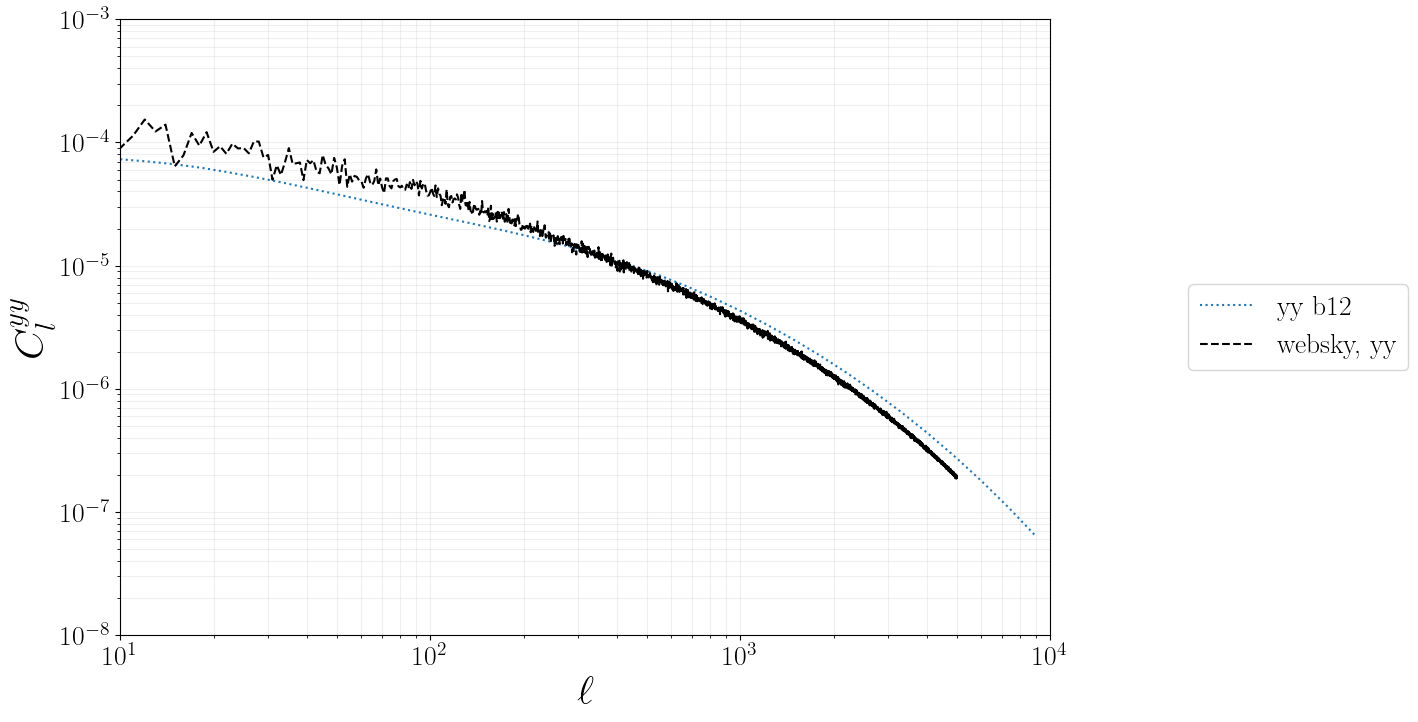

In [50]:
plt.figure(figsize=(12,8))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.title("$|$ tSZ $\\times$ tSZ $|$ in $Jy^2/sr$", fontsize=30)
plt.xlabel('$\ell$',fontsize=30)
plt.ylabel(r"$  C_l^{yy}  \,\,\,$", size=30)
plt.grid(which='both',alpha=0.2)
plt.xlim(10, 10000) 
plt.ylim(1e-8, 1e-3) 

ell_yy = np.asarray(cl_sz['ell'])
cls_to_dls = ell_yy*(ell_yy+1.)/2./np.pi
yy = np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h'])

#class-sz
plt.loglog(ell_yy, yy/cls_to_dls,":", label=r'yy b12')
#plt.loglog(ell_A10, cl_yy_A10/cls_to_dls,":", label=r'yy a10')
#websky
plt.loglog(ell_ws, 10**12 *ws_yy,"--",color="black", label=r'websky, yy')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


## compare websky and ccl 

In [51]:


# cosmo = ccl.Cosmology(Omega_b=ccl_['omega_b']/p_dict['h']**2.,
#                            Omega_c=p_dict['Omega_cdm'],
#                            h=p_dict['h'],
#                            n_s=p_dict['n_s'],
#                            A_s=p_dict['A_s'],
#                            Neff=3.046)
# mdef = ccl.halos.MassDef200m()
# cM = ccl.halos.ConcentrationDuffy08(mdef)
# hmf = ccl.halos.MassFuncTinker10(cosmo, mdef, norm_all_z=True)
# bM = ccl.halos.HaloBiasTinker10(cosmo, mdef)
# hmc = ccl.halos.HMCalculator(cosmo, hmf, bM, mdef)


# pr = ccl.halos.HaloProfileCIBShang12(cM, freq_cib_CCL, Mmin=1E10)
# pr.update_parameters(nu_GHz=freq_cib_CCL,
#                               alpha=0.36,
#                               T0=24.4,
#                               beta=1.75,
#                               gamma=1.7,
#                               s_z=3.6,
#                               log10meff=12.6,
#                               sigLM=np.sqrt(0.5),
#                               Mmin=1E10,
#                               L0=6.4E-8)

# pr2pt = ccl.halos.Profile2ptCIB()

# tracers = {}
# # tSZ
# tracers['y'] = ccl.tSZTracer(cosmo, z_max=4.)
# # CIB
# tracers['c'] = ccl.CIBTracer(cosmo, z_min=0.05)
# profs = {}
# # This just defines which of these tracers should be normalized (e.g. overdensities)
# norm = {}
# # tSZ
# profs['y'] = ccl.halos.HaloProfilePressureGNFW(alpha_P=, gamx_out=6)
# norm['y'] = False
# # CIB
# profs['c'] = ccl.halos.HaloProfileCIBShang12(cM, nu_GHz=freq_cib_CCL,
#                               alpha=0.36,
#                               T0=24.4,
#                               beta=1.75,
#                               gamma=1.7,
#                               s_z=3.6,
#                               log10meff=12.6,
#                               sigLM=np.sqrt(0.5),
#                               Mmin=1E10,
#                               L0=6.4E-8)
# norm['c'] = False

# lk_arr = np.log(np.geomspace(1E-4, 100, 256))
# a_arr = 1./(1+np.linspace(0, 6., 40)[::-1])



# CIB 

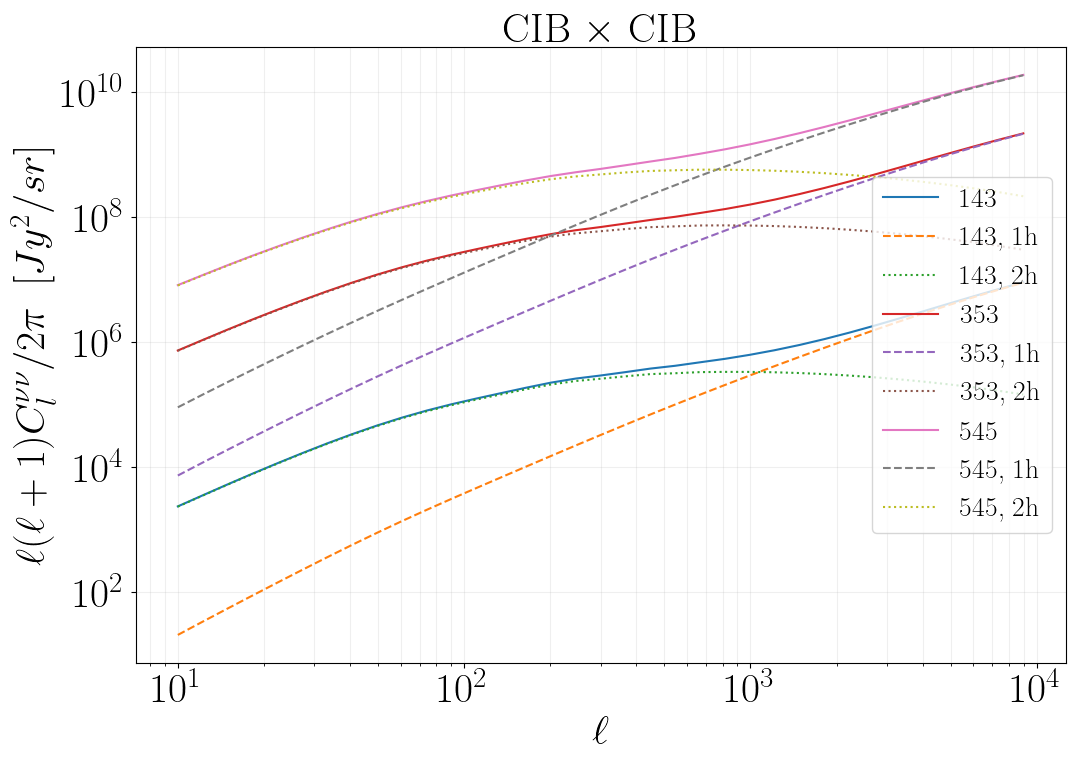

In [52]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\nu \nu} / 2 \pi \,\,\, [Jy^2/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

for (i,nu) in enumerate(nu_list):
    #CIB
    ell_cib = cl_cib_cib[str(nu)+'x'+str(nu)]['ell']
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])

    plt.plot(ell_cib, dls_cib_1h + dls_cib_2h, label=r' %.1i'%(nu))
    plt.plot(ell_cib, dls_cib_1h,"--",  label=r' %.1i, 1h'%(nu))
    plt.plot(ell_cib, dls_cib_2h, ":", label=r' %.1i, 2h'%(nu))

plt.legend(loc='right',  fontsize=20)    
  

In [53]:
def ccl_CIB_boris_benchmark(freq_cib_CCL):
    cosmo = ccl.Cosmology(Omega_b=ccl_params['omega_b']/ccl_params['h']**2.,
                           Omega_c=ccl_params['Omega_cdm'],
                           h=ccl_params['h'],
                           n_s=ccl_params['n_s'],
                           A_s=ccl_params['A_s'],
                           Neff=3.046)
    mdef = ccl.halos.MassDef200m()
    cM = ccl.halos.ConcentrationDuffy08(mdef)
    nM = ccl.halos.MassFuncTinker10(cosmo, mdef, norm_all_z=True)
    bM = ccl.halos.HaloBiasTinker10(cosmo, mdef)
    hmc = ccl.halos.HMCalculator(cosmo, nM, bM, mdef)
    
    pr = ccl.halos.HaloProfileCIBShang12(cM, freq_cib_CCL, Mmin=1E10)
    pr.update_parameters(nu_GHz=freq_cib_CCL,
                              alpha=0.36,
                              T0=24.4,
                              beta=1.75,
                              gamma=1.7,
                              s_z=3.6,
                              log10meff=12.6,
                              sigLM=np.sqrt(0.5),
                              Mmin=1E10,
                              L0=6.4E-8)

    pr2pt = ccl.halos.Profile2ptCIB()

    # CIB tracer
    tr = ccl.CIBTracer(cosmo, z_min=common_settings['z_min'])

    # 3D power spectrum
    pk = ccl.halos.halomod_Pk2D(cosmo, hmc, pr, prof_2pt=pr2pt)

    # Angular power spectrum
    # ls = bm[0]
    ls = np.geomspace(common_settings['ell_min'],common_settings['ell_max'],100)

    cl = ccl.angular_cl(cosmo, tr, tr, ls, p_of_k_a=pk)


    dl = cl*ls*(ls+1)/(2*np.pi)
    l_ccl = ls
    dl_ccl = dl
    return l_ccl, dl_ccl, cl
    

l_ccl_353, dl_ccl_353, cl_ccl_353,  = ccl_CIB_boris_benchmark(353)
l_ccl_545, dl_ccl_545, cl_ccl_545,  = ccl_CIB_boris_benchmark(545)


In [54]:
# recompute class-sz for ccl params 
M = Class()
M.set({'output':'cib_cib_1h,cib_cib_2h,tSZ_cib_1h,tSZ_cib_2h,tSZ_1h,tSZ_2h'})
M.set(common_settings)
M.set(ccl_params)


M.set({
       'cib_frequency_list_num' : len(nu_list),
       'cib_frequency_list_in_GHz' : nu_list_str,  
      })
M.compute()

cl_cib_cib = M.cl_cib_cib()

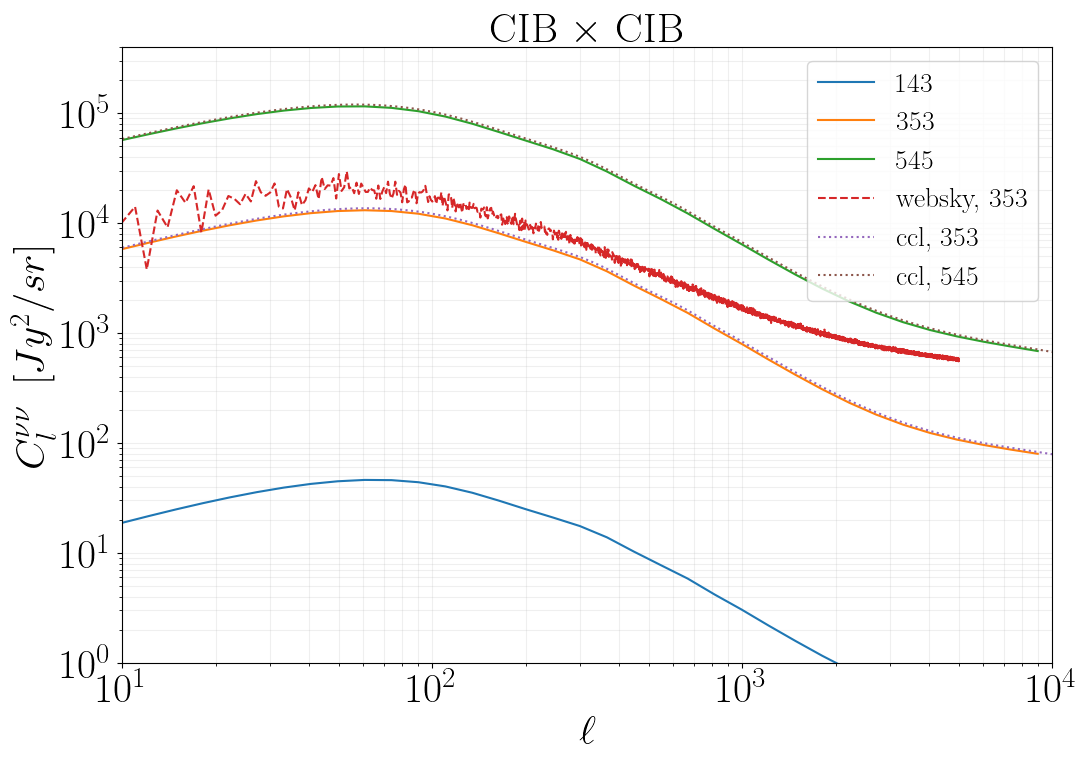

In [55]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$C_l^{\nu \nu} \,\,\, [Jy^2/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'CIB $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(10, 10000)
plt.ylim(1, 4*1e5)

#class-sz
for (i,nu) in enumerate(nu_list[:3]):
    #CIB
    ell_cib = np.asarray(cl_cib_cib[str(nu)+'x'+str(nu)]['ell'])
    cls_to_dls = ell_cib*(ell_cib+1)/2/np.pi
    dls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    dls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    plt.plot(ell_cib, (dls_cib_1h + dls_cib_2h)/cls_to_dls, label=r' %.1i'%(nu))
#websky
#plt.plot(1e12*ws_cib217, "--", label=r'websky, 217')
plt.plot(1e12*ws_cib353, "--", label=r'websky, 353')
#plt.plot(1e12*ws_cib545, "--", label=r'websky, 545')

#ccl
plt.plot(l_ccl_353, cl_ccl_353, ":", label=r'ccl, 353')
plt.plot(l_ccl_545, cl_ccl_545, ":", label=r'ccl, 545')

plt.legend( fontsize=20)    
  

# tSZ x CIB

In [56]:
convert_Jysr_to_uK(217)

472.4010897987546

In [57]:
1/convert_Jysr_to_uK(217)

0.0021168452435747034

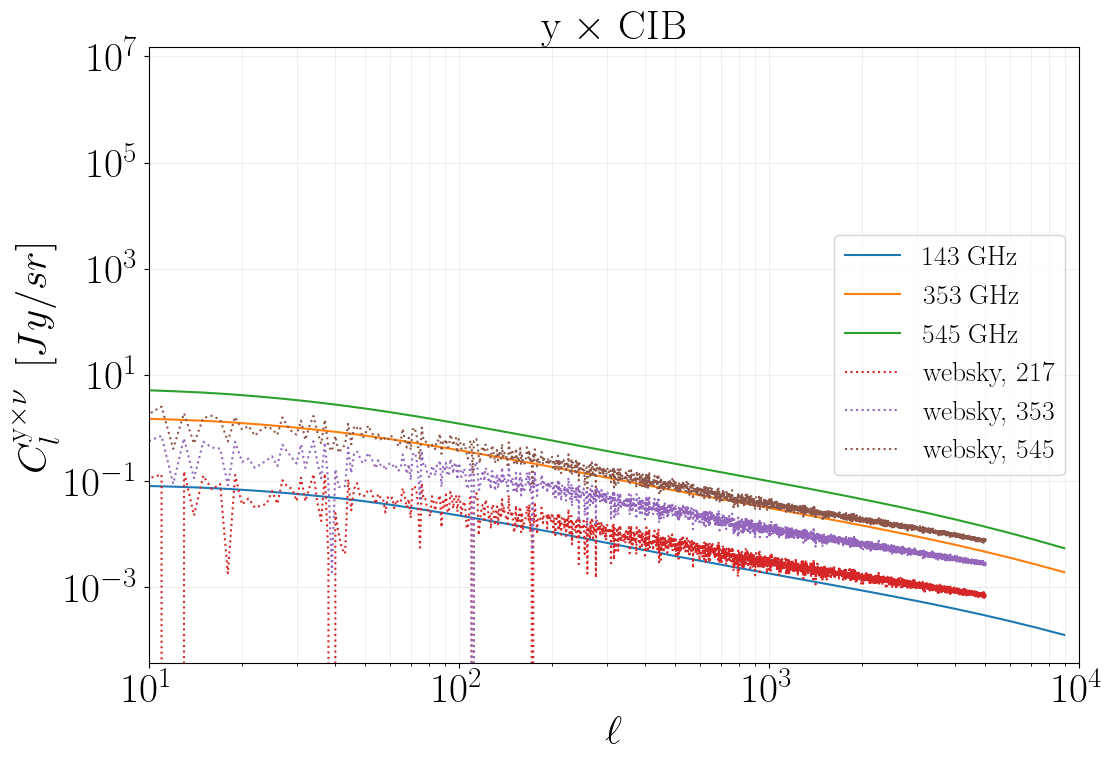

In [58]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$ C_l^{\rm{y \times \nu}} \,\,\, [Jy/sr]$", size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(10, 10000) 

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    cl_yCIB_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_yCIB_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    plt.plot(ell_tsz_cib, (cl_yCIB_1h+cl_yCIB_2h)/cls_to_dls, '-',label=r' %.1i GHz'%(nu))
#websky 1e6, for for 1e6 
plt.plot(1e12*ws_ycib217, ":", label=r'websky, 217')
plt.plot(1e12*ws_ycib353, ":", label=r'websky, 353')
plt.plot(1e12*ws_ycib545, ":", label=r'websky, 545')

# plt.plot(1e12*ws_ycib217/convert_Jysr_to_uK(217), ":", label=r'websky, 217')
# plt.plot(1e12*ws_ycib353/convert_Jysr_to_uK(353), ":", label=r'websky, 353')
# plt.plot(1e12*ws_ycib545/convert_Jysr_to_uK(545), ":", label=r'websky, 545')


plt.legend(loc='right',  fontsize=20)    
  

In [59]:
ell_websky=np.arange(1, len(ws_ycib217)+1, 1)
cl_to_dl_ws= ell_websky*(ell_websky+1)/2/np.pi

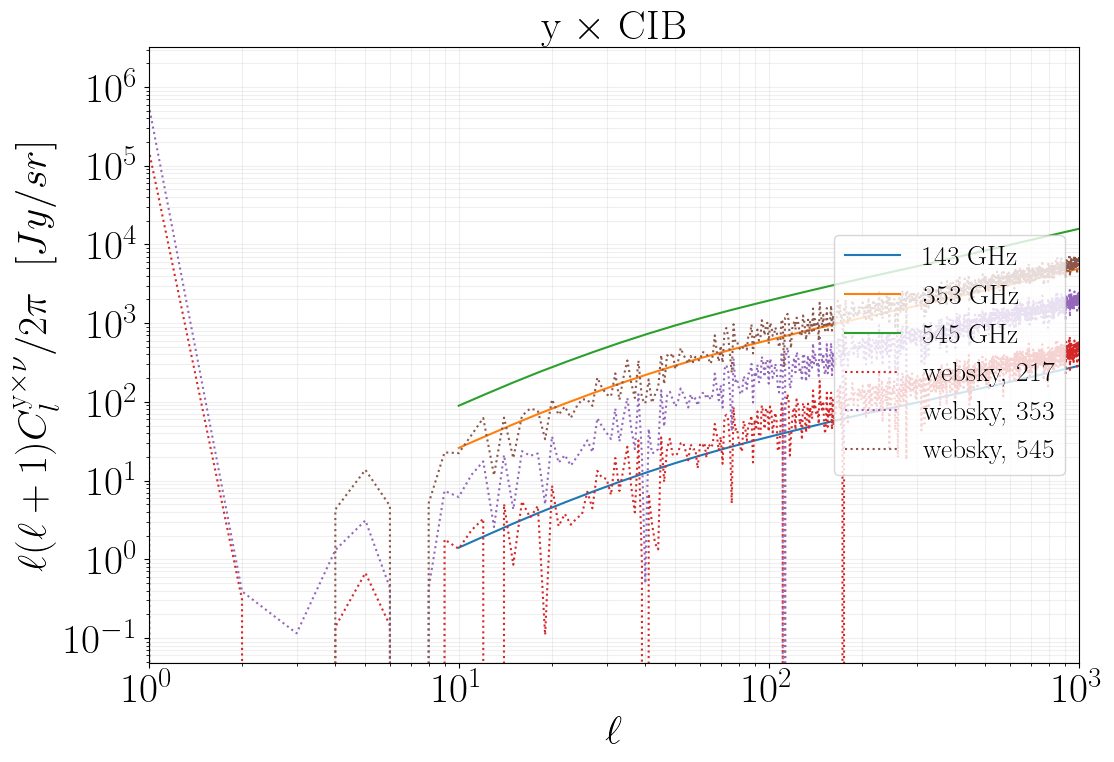

In [60]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{y \times \nu}} / 2 \pi  \ \ [Jy/sr]$", fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'y $\times$ CIB', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1, 1000) 

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    cl_yCIB_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_yCIB_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    plt.plot(ell_tsz_cib, (cl_yCIB_1h+cl_yCIB_2h),'-',label=r' %.1i GHz'%(nu))

#websky 1e6, for 
plt.plot(ell_websky, 1e12*ws_ycib217*cl_to_dl_ws, ":", label=r'websky, 217')
plt.plot(ell_websky, 1e12*ws_ycib353*cl_to_dl_ws, ":", label=r'websky, 353')
plt.plot(ell_websky, 1e12*ws_ycib545*cl_to_dl_ws, ":", label=r'websky, 545')

plt.legend(loc='right',  fontsize=20)    
  


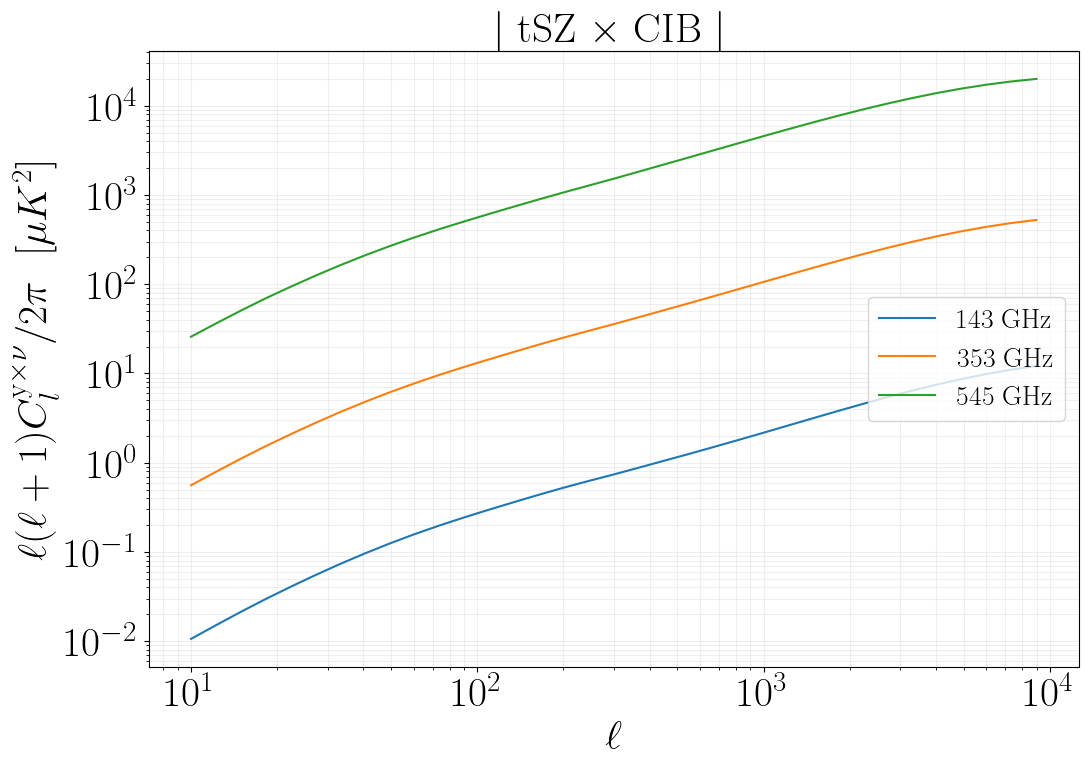

In [61]:
plt.figure(figsize=(12,8))
plt.xlabel(r"$\ell$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{\rm{y \times \nu}} / 2 \pi  \ \ [\mu K^2]$", fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title(r'$|$ tSZ $\times$ CIB $|$', fontsize=30)
plt.grid(which='both',alpha=0.2)
plt.yscale("log")
plt.xscale("log")

ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
cls_to_dls = ell_tsz_cib*(ell_tsz_cib+1.)/2./np.pi

for (i,nu) in enumerate(nu_list):
    cl_yCIB_1h = np.asarray(cl_tsz_cib[str(nu)]['1h']) /convert_Jysr_to_uK(nu)
    cl_yCIB_2h = np.asarray(cl_tsz_cib[str(nu)]['2h']) /convert_Jysr_to_uK(nu)
    plt.plot(ell_tsz_cib, (cl_yCIB_1h+cl_yCIB_2h)*abs(tSZ_spectral_funct_at_nu_in_GHz(nu)),'-',label=r' %.1i GHz'%(nu))

plt.legend(loc='right',  fontsize=20)    
  


# correlation coefficients 

eq. 38 in https://arxiv.org/pdf/2006.16329.pdf

corr 

## CIB x tSZ

I am ignoring all the CIB unit conversions and tSZ spectral fuction because it would cancel anyway

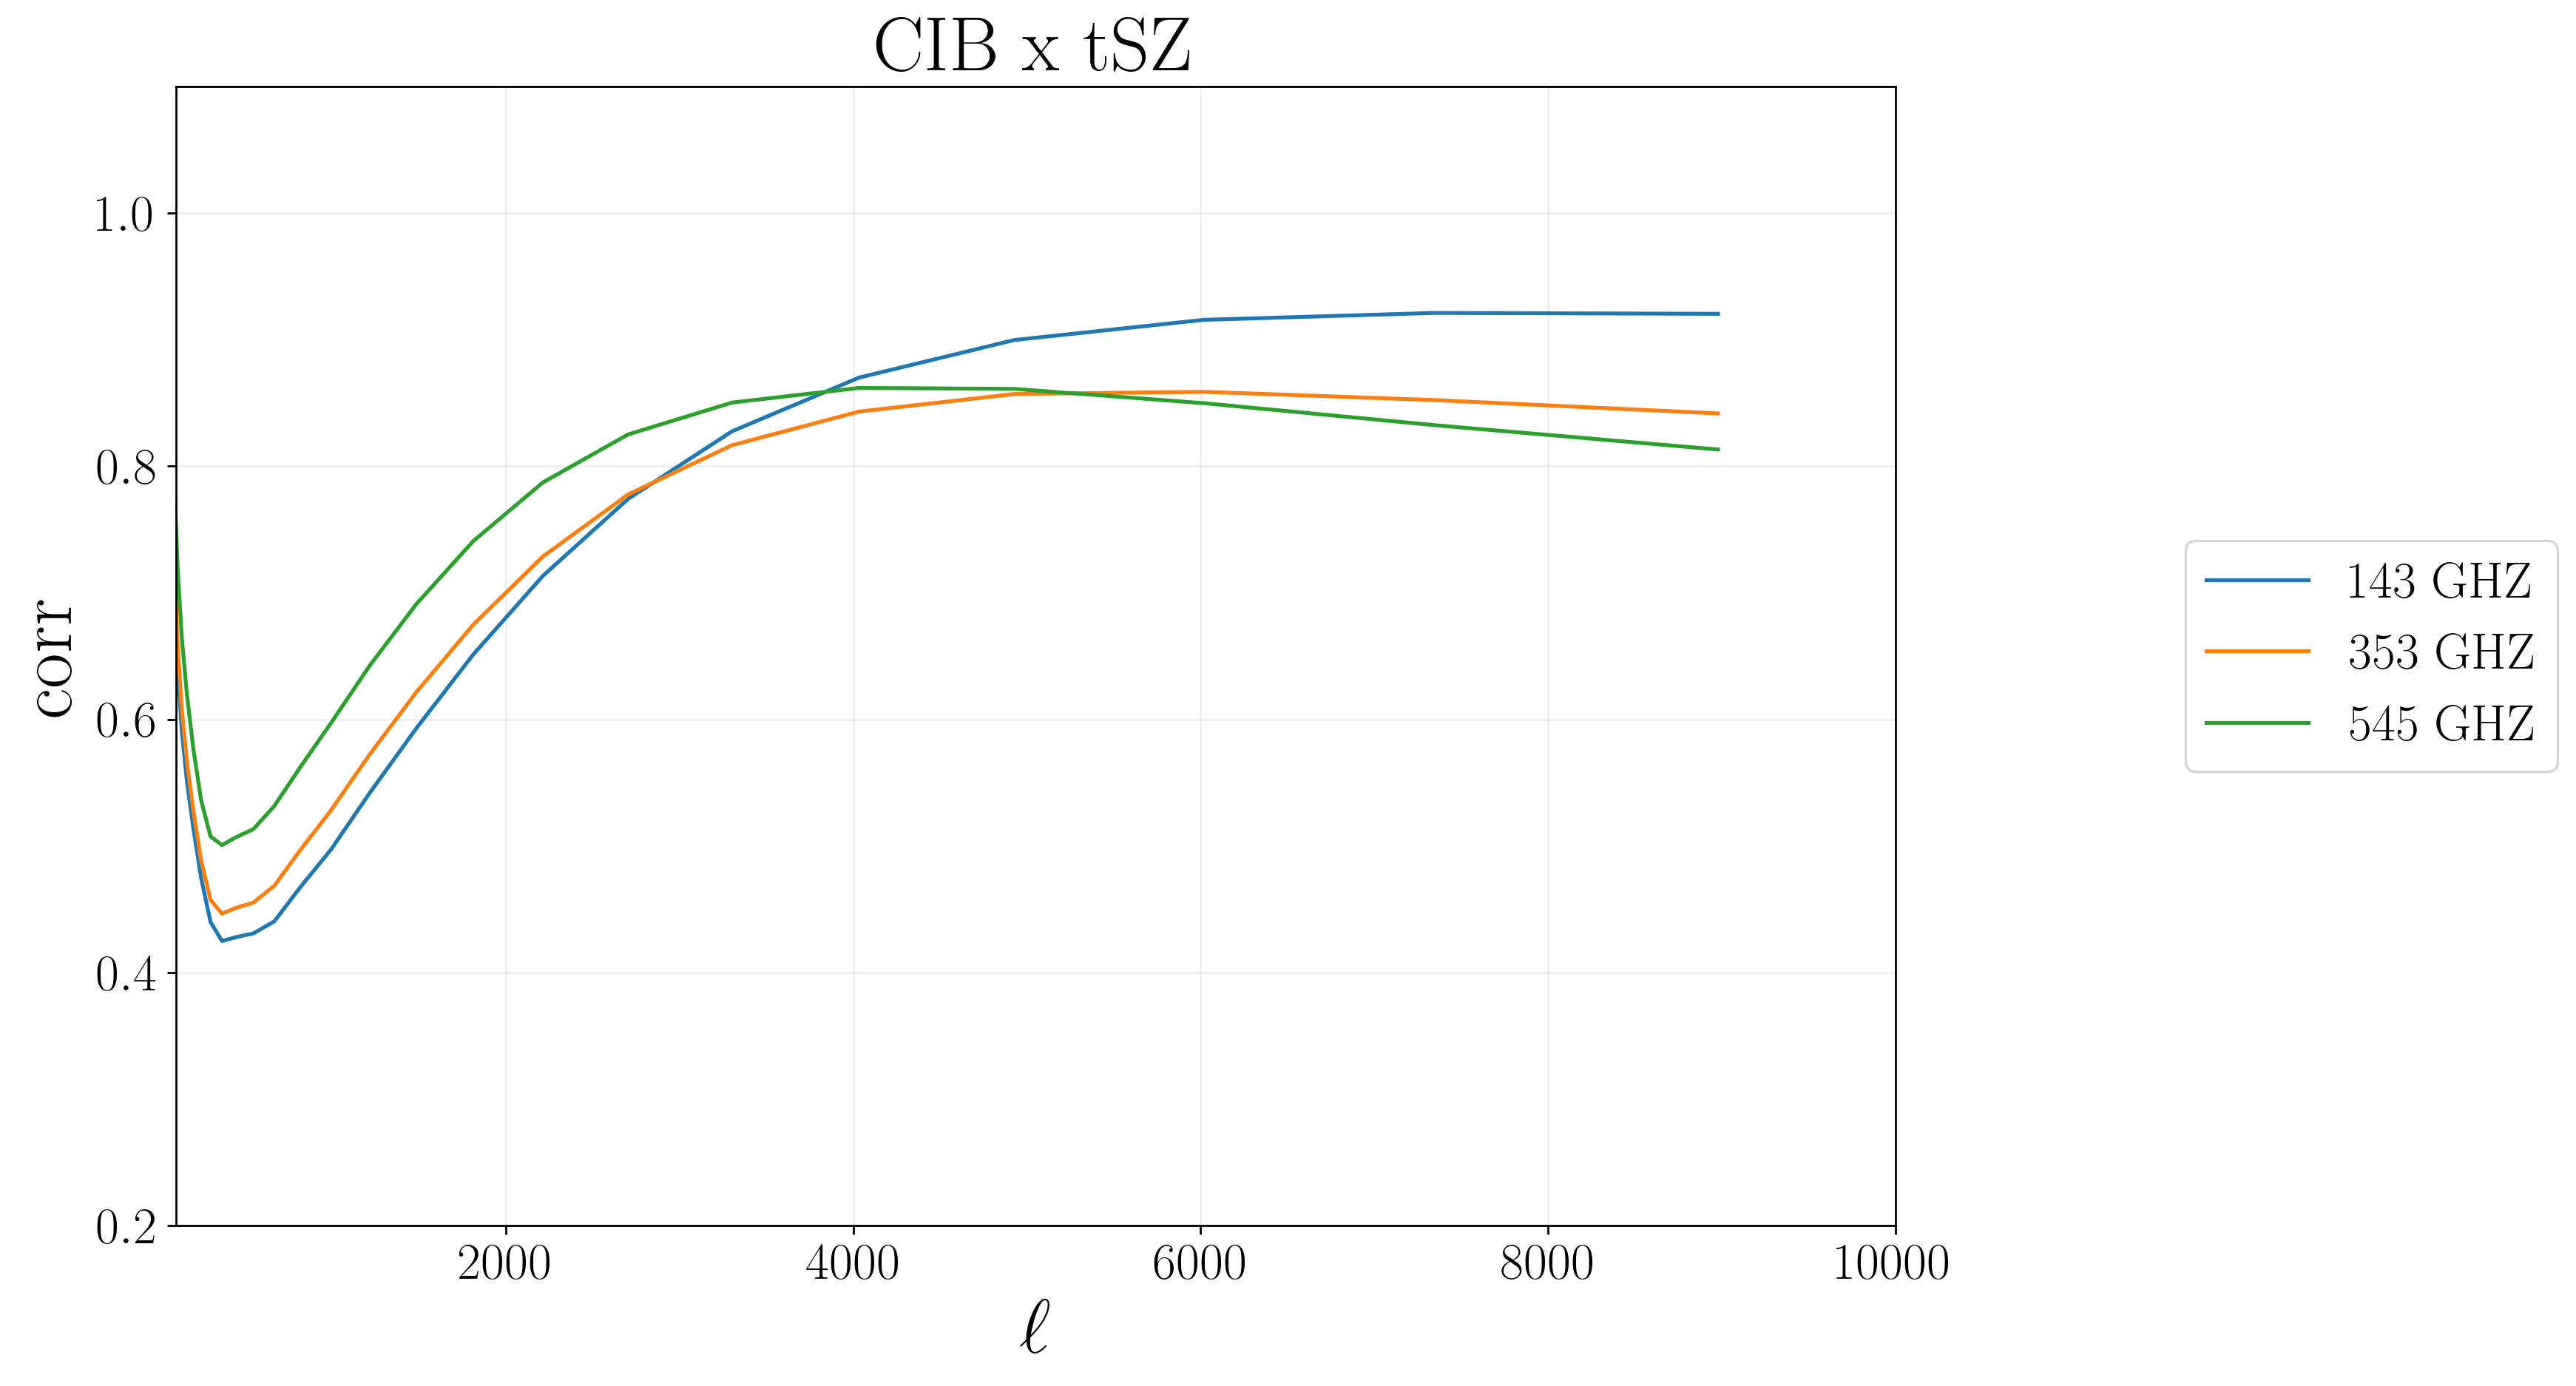

In [70]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x tSZ', fontsize=30)
plt.xlim(100, 10000)
plt.ylim(0.2, 1.1)

for (i,nu) in enumerate(nu_list):  
    ## tSZ
    tsz_tsz = yy
      
    ## CIB
    cls_cib_1h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['1h'])
    cls_cib_2h = np.asarray(cl_cib_cib[str(nu_list[i])+'x'+str(nu_list[i])]['2h'])
    CIB = (cls_cib_1h+cls_cib_2h) 
  
    #tSZ x CIB 
    ell_tsz_cib = np.asarray(cl_tsz_cib[str(nu_list[0])]['ell'])
    cl_y_cib_1h = np.asarray(cl_tsz_cib[str(nu)]['1h'])
    cl_y_cib_2h = np.asarray(cl_tsz_cib[str(nu)]['2h'])
    CIBy = (cl_y_cib_1h+cl_y_cib_2h)
    
    #correlation coeff
    corr = CIBy/np.sqrt(CIB*yy)   
    plt.plot(ell_tsz_cib, corr, label = "%.1i GHZ"%(nu))
    
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(which='both',alpha=0.2)
    plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 

## correlation websky


In [63]:
corr217 = ws_ycib217/np.sqrt(ws_cib217*ws_yy)  
corr353 = ws_ycib353/np.sqrt(ws_cib353*ws_yy) 
corr545 = ws_ycib545/np.sqrt(ws_cib545*ws_yy) 


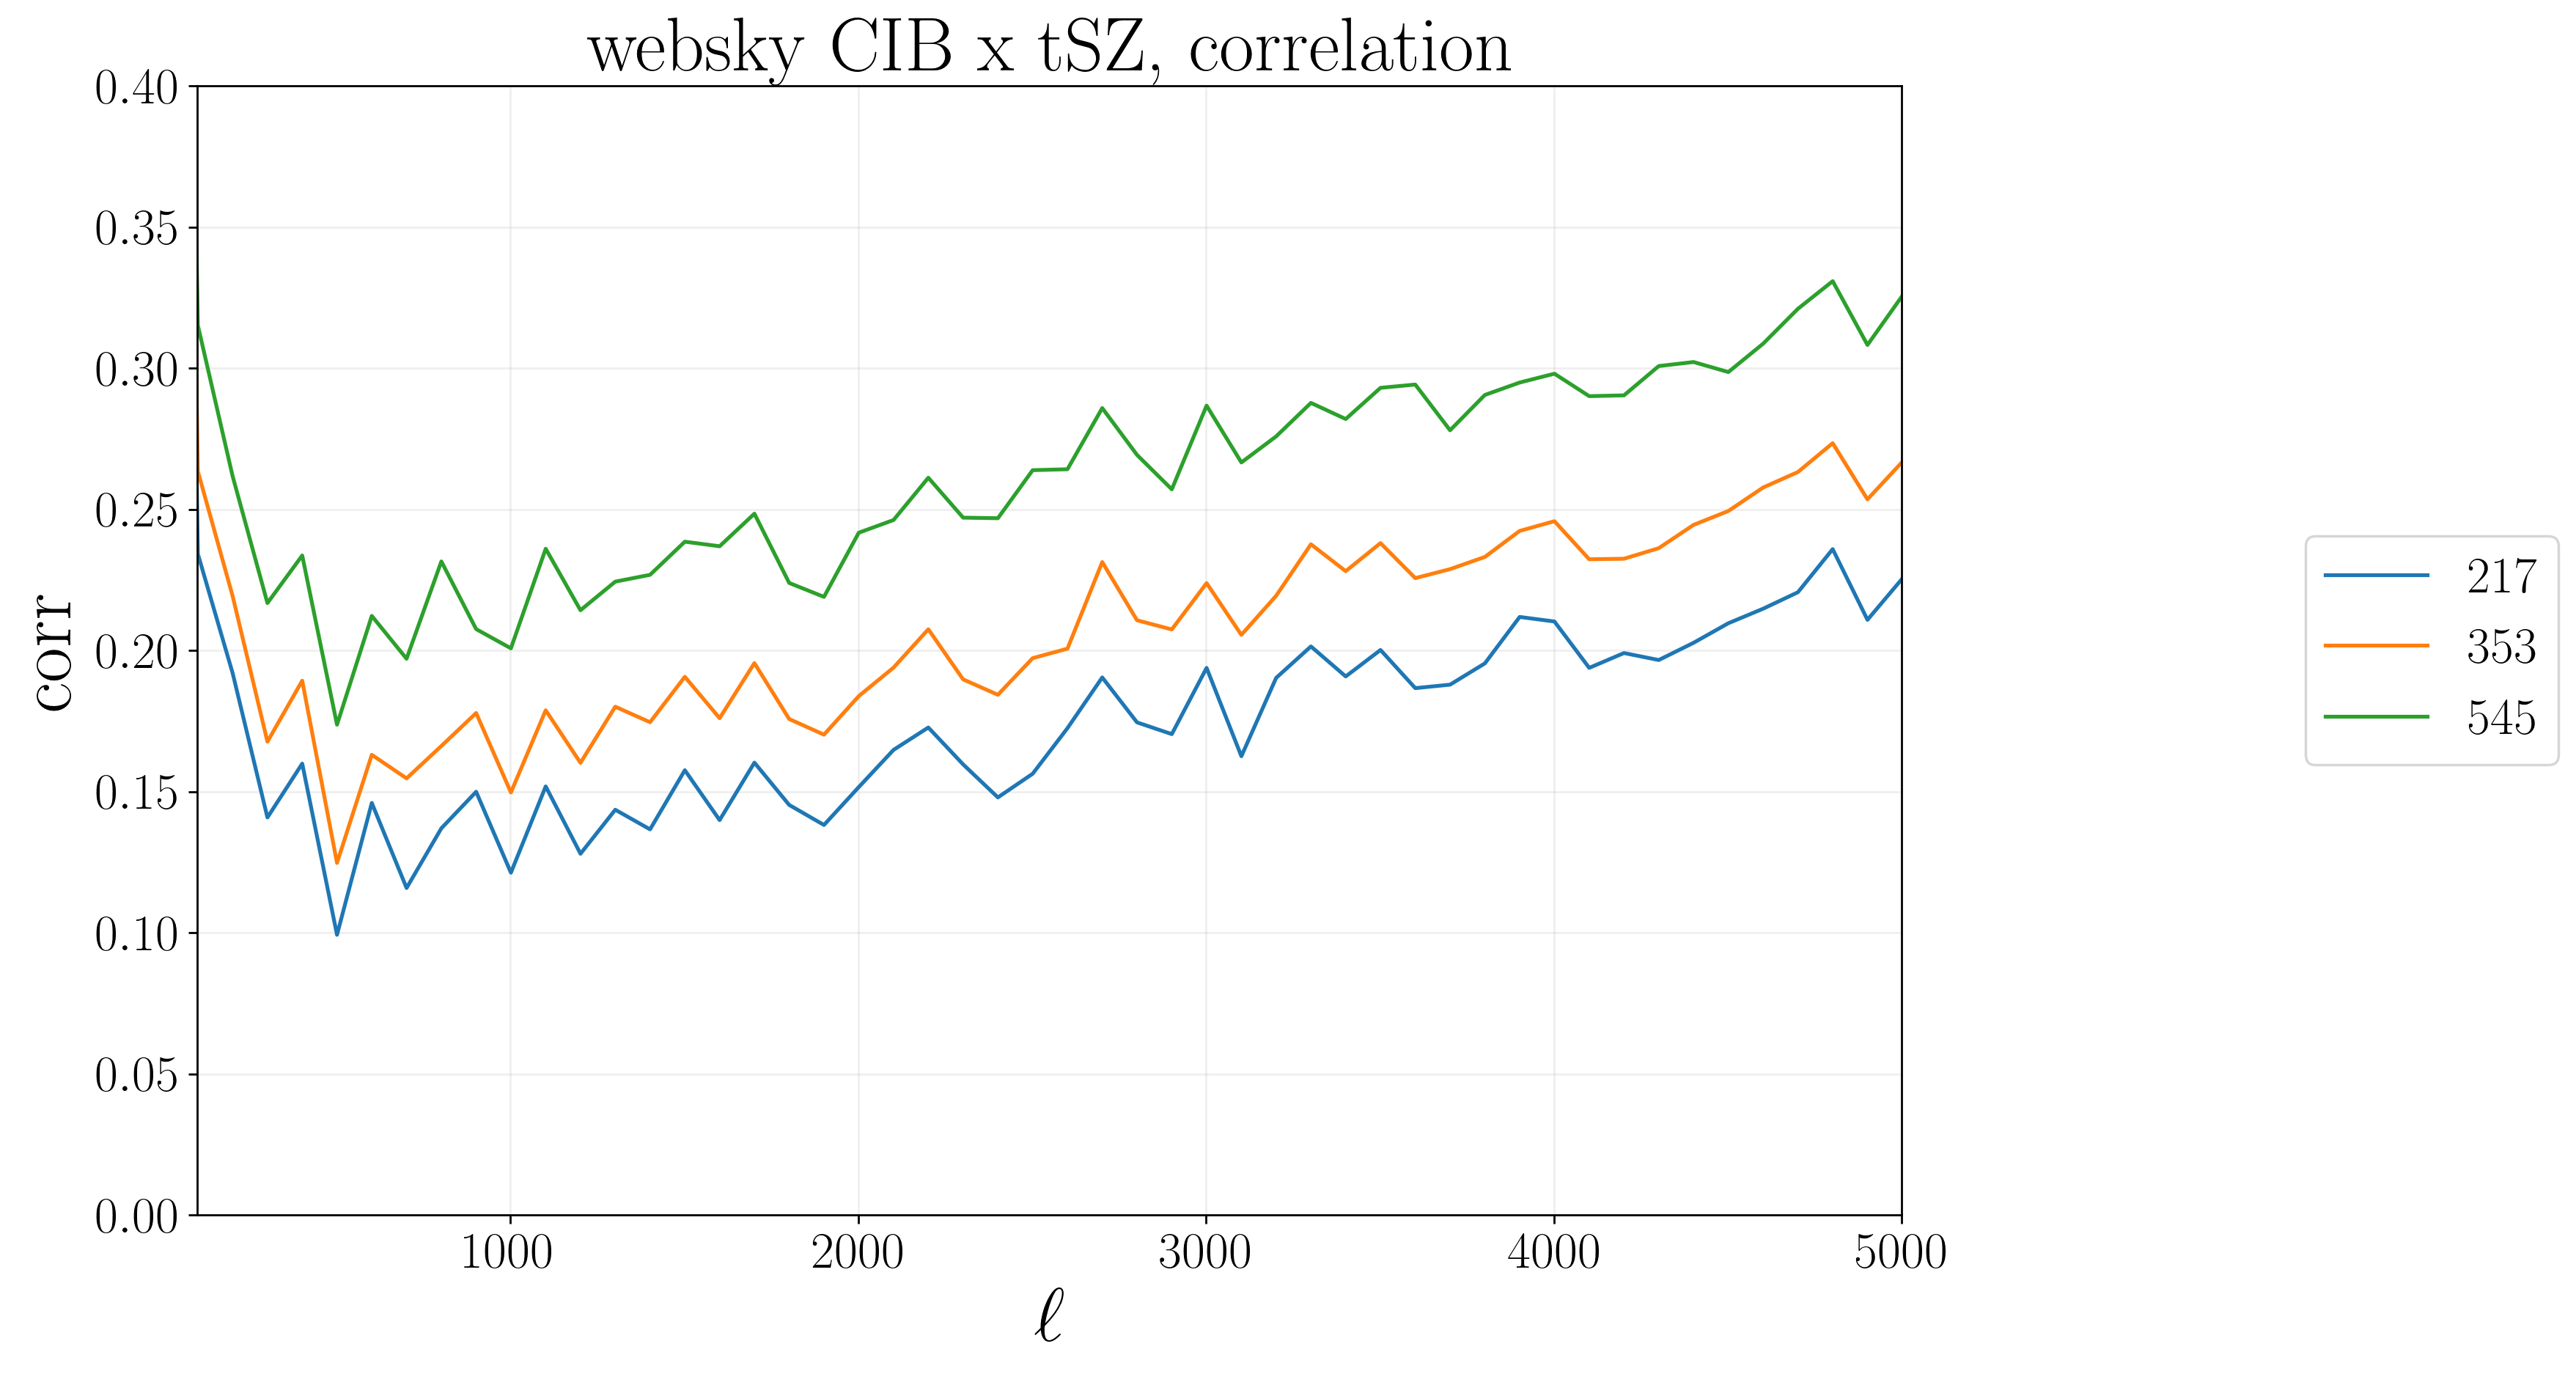

In [64]:
ell_cib = np.asarray(cl_cib_cib[str(nu_list[0])+'x'+str(nu_list[0])]['ell'])
cls_to_dls = ell_cib*(ell_cib+1.)/2./np.pi

plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('websky CIB x tSZ, correlation', fontsize=30)
plt.xlim(100, 5000)
plt.ylim(0,0.4)

plt.plot(ell_ws[::100], corr217[::100], label = "217")
plt.plot(ell_ws[::100], corr353[::100], label = "353")
plt.plot(ell_ws[::100], corr545[::100],label = "545")

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

 

In [65]:
ell_ws[::4]

array([   1,    5,    9, ..., 4993, 4997, 5001])